In [ ]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pip install --upgrade scikit-learn


In [ ]:
df=pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [ ]:
df.describe(include='object')


,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print('\n')

Sex
M    104
F     96
Name: count, dtype: int64


BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64


Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64




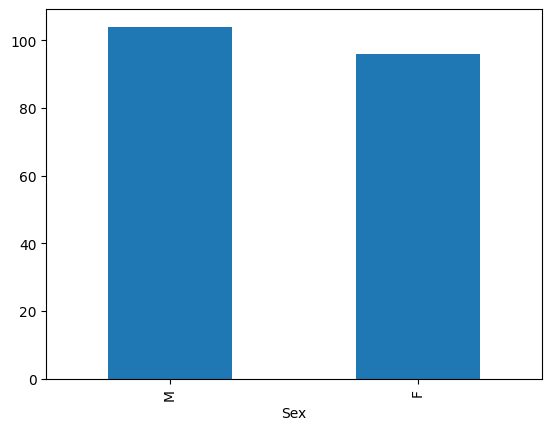

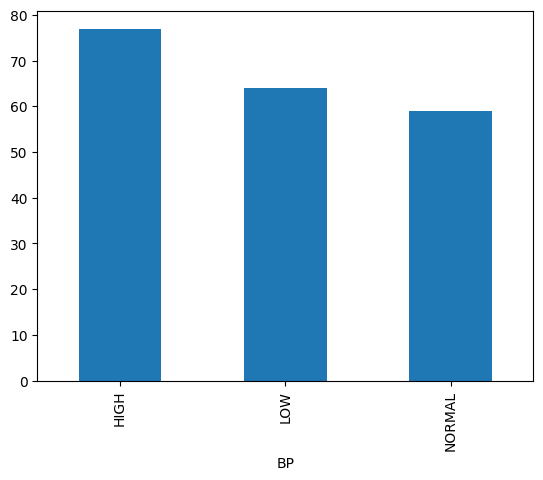

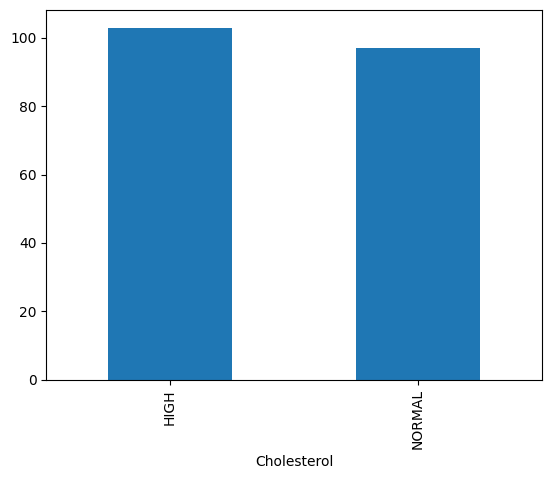

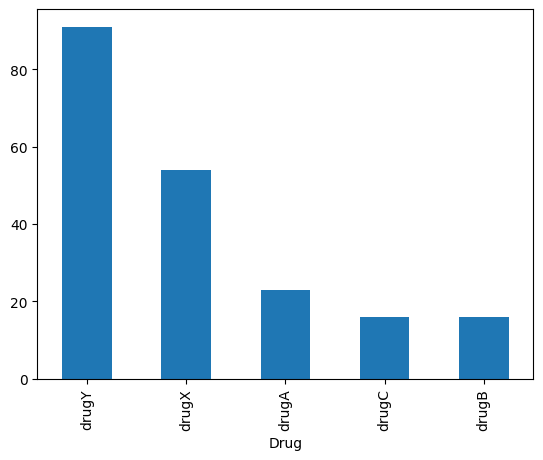

In [ ]:
for i in df.select_dtypes(include='object').columns:
  df[i].value_counts().plot(kind='bar')
  # plt.title(i)
  plt.show()

<Axes: xlabel='Age', ylabel='Count'>

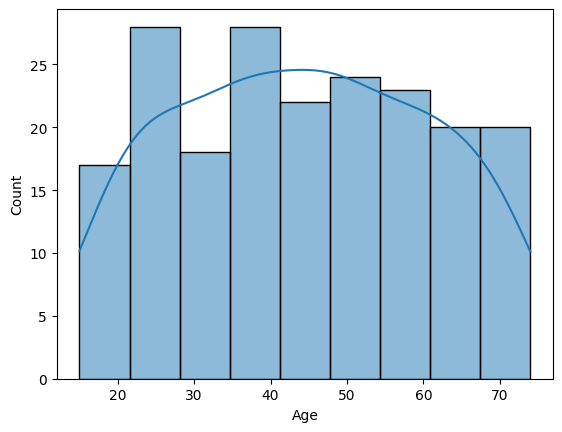

In [ ]:
sns.histplot(x=df['Age'], kde=True)


<Axes: xlabel='Na_to_K', ylabel='Count'>

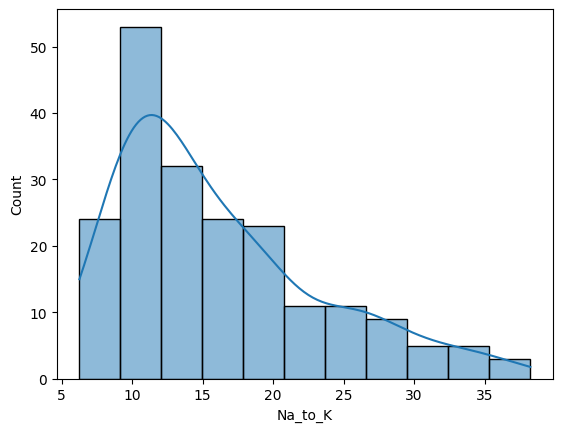

In [ ]:
sns.histplot(x=df['Na_to_K'], kde=True)


Na to K ration is sright-kewed

<Axes: xlabel='Drug', ylabel='count'>

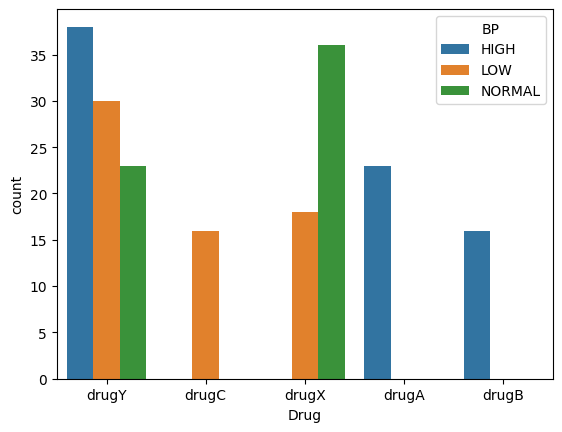

In [ ]:
sns.countplot(x='Drug',hue='BP',data=df)

drug A, drug B are the drug used for high blood pressure.
drug C is the drug used for low blood pressure.

<Axes: xlabel='Drug', ylabel='count'>

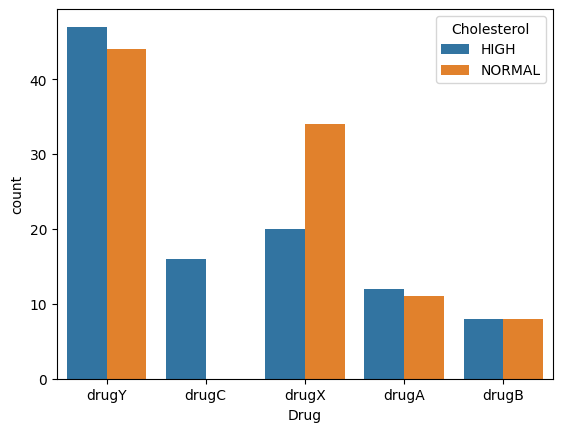

In [ ]:
sns.countplot(x='Drug',hue='Cholesterol',data=df)

Drug C is used for high cholesterol.

<Axes: xlabel='Drug'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


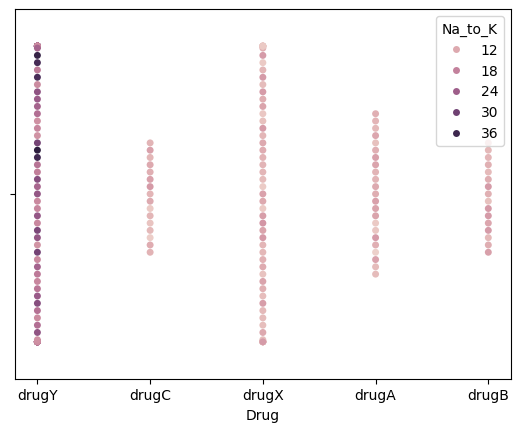

In [ ]:
sns.swarmplot(x='Drug',hue='Na_to_K',data=df)

In [ ]:
df1=df.copy()

In [ ]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()
label_encode_list = ['Sex','BP','Cholesterol','Drug']

for i in label_encode_list:
    df1[i] = label_encode.fit_transform(df1[i])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1.drop('Drug',axis=1),df1['Drug'],test_size=0.3,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[ 6  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 26]]
0.9833333333333333


In [ ]:
import pickle
filename = "model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)
